In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes's acc: {acc}")

Naive Bayes's acc: 0.18932038834951456


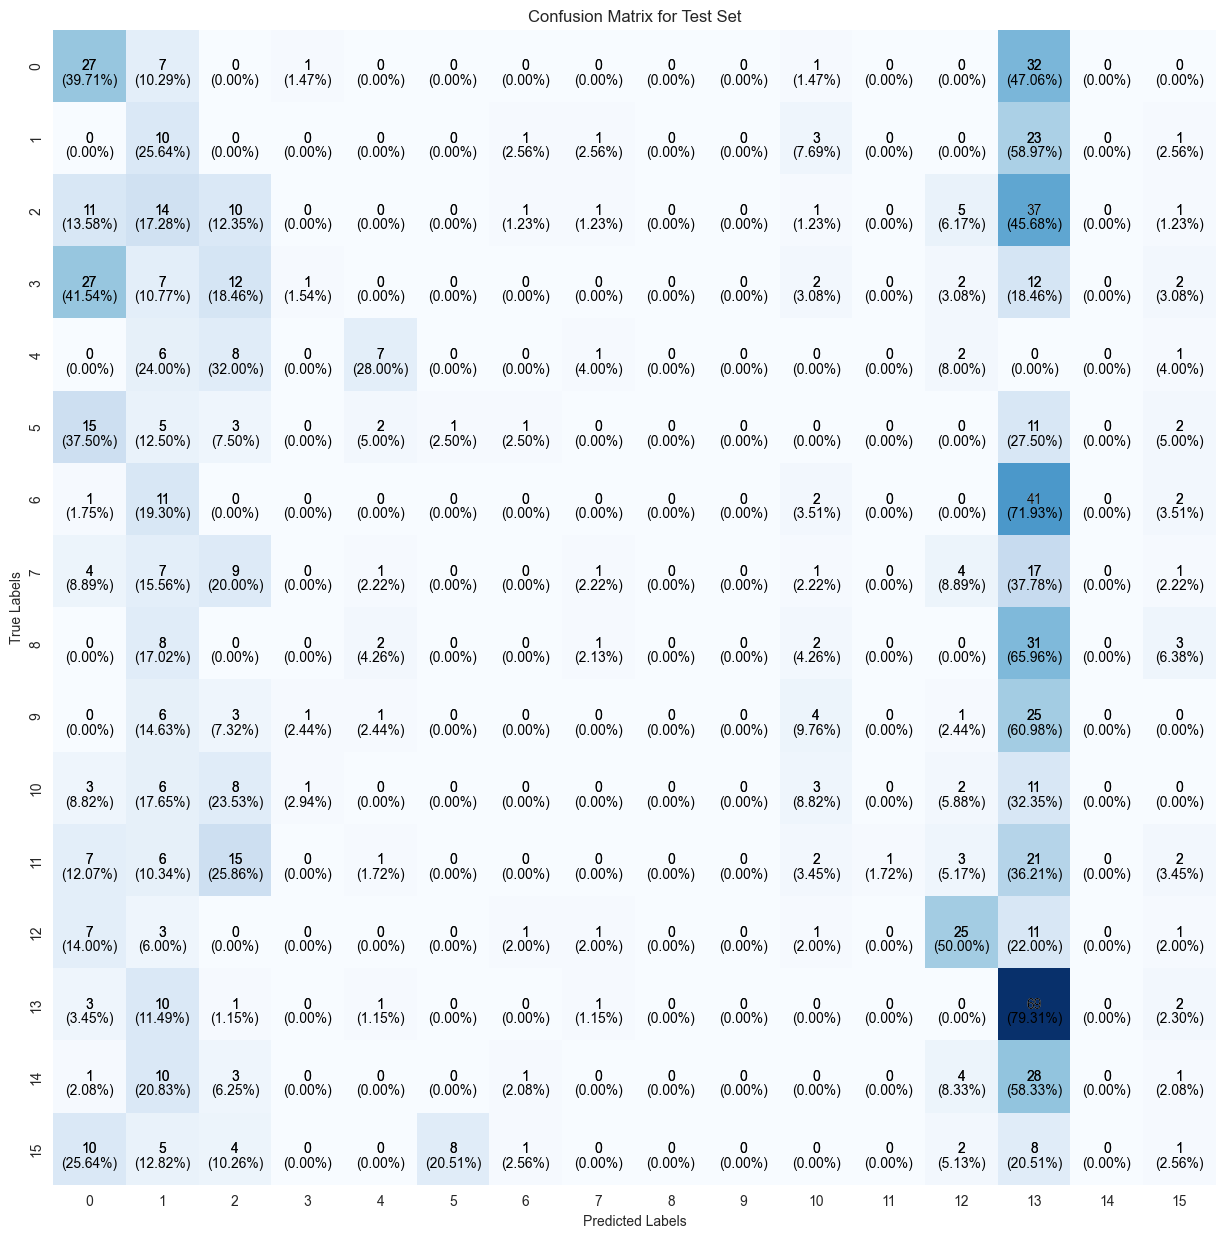

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.40      0.29        68
           1       0.08      0.26      0.12        39
           2       0.13      0.12      0.13        81
           3       0.25      0.02      0.03        65
           4       0.47      0.28      0.35        25
           5       0.11      0.03      0.04        40
           6       0.00      0.00      0.00        57
           7       0.14      0.02      0.04        45
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        41
          10       0.14      0.09      0.11        34
          11       1.00      0.02      0.03        58
          12       0.50      0.50      0.50        50
          13       0.18      0.79      0.30        87
          14       0.00      0.00      0.00        48
          15       0.05      0.03      0.03        39

    accuracy                           0.19       824
   macro avg       0.21   

/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

--------------------------------------------------------------------------------------------

In [9]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [10]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [11]:
y = df['Role_encoded']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes's acc: {acc}")

Naive Bayes's acc: 0.19053398058252427


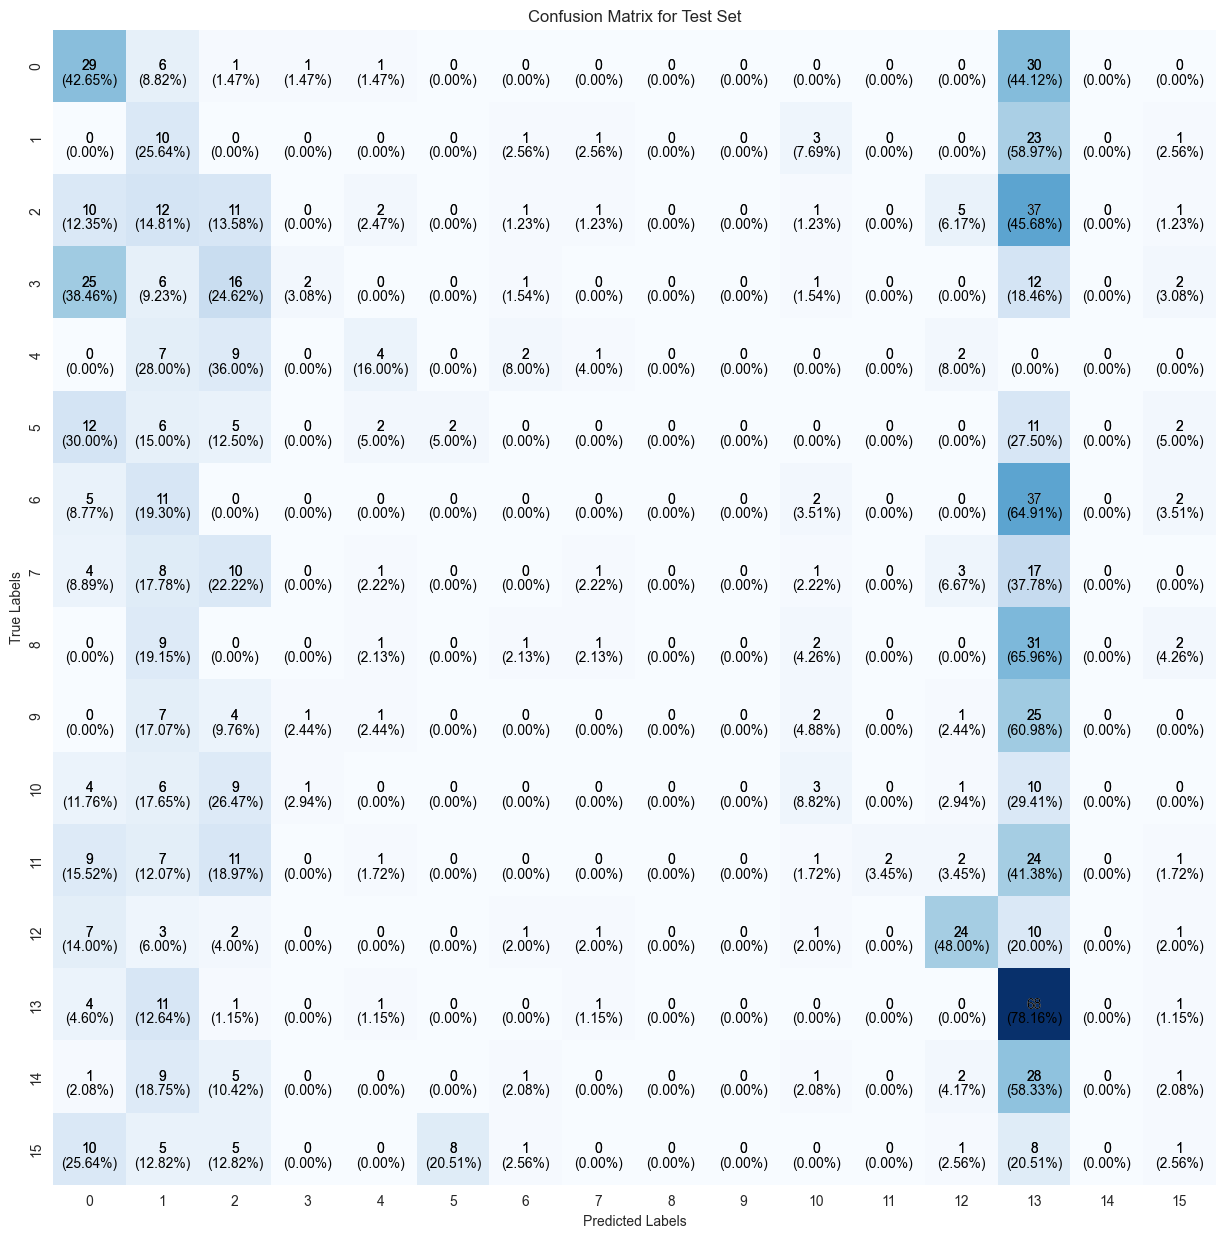

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.43      0.31        68
           1       0.08      0.26      0.12        39
           2       0.12      0.14      0.13        81
           3       0.40      0.03      0.06        65
           4       0.29      0.16      0.21        25
           5       0.20      0.05      0.08        40
           6       0.00      0.00      0.00        57
           7       0.14      0.02      0.04        45
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        41
          10       0.17      0.09      0.12        34
          11       1.00      0.03      0.07        58
          12       0.59      0.48      0.53        50
          13       0.18      0.78      0.30        87
          14       0.00      0.00      0.00        48
          15       0.07      0.03      0.04        39

    accuracy                           0.19       824
   macro avg       0.22   

/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me